# Projeto 2 - Ciência dos Dados

Integrantes do grupo: Fernanda de Oliveira Pereira, Giovana Cassoni Andrade, Giselle Vieira de Melo, Guilherme dos Santos Martins e Marlon Silva Pereira.

### Objetivo

Esse projeto tem o propósito de prever uma variável principal (Target) em função de demais outras variáveis (Features) que podem influenciar em seu comportamento.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm, probplot

In [2]:
filename = 'covid-data-brazil.xlsx'

In [3]:
data_base = pd.read_excel(filename)
data_base.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,BRA,South America,Brazil,2020-02-26,1,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
1,BRA,South America,Brazil,2020-02-27,1,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2,BRA,South America,Brazil,2020-02-28,1,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
3,BRA,South America,Brazil,2020-02-29,2,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066
4,BRA,South America,Brazil,2020-03-01,2,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
5,BRA,South America,Brazil,2020-03-02,2,0.0,0.286,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
6,BRA,South America,Brazil,2020-03-03,2,0.0,0.286,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
7,BRA,South America,Brazil,2020-03-04,4,2.0,0.429,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
8,BRA,South America,Brazil,2020-03-05,4,0.0,0.429,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
9,BRA,South America,Brazil,2020-03-06,13,9.0,1.714,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


Aqui será filtrada a base de dados, fornecendo apenas as colunas que influenciam no nosso Target, excluindo as colunas que mostram informações constantes da população e do país, como o número de indivíduos com doenças crônicas ou o IDH, e as colunas que não afetam nossa análise.

Outro filtro irá excluir as linhas que não possuem números nos dados (NaN), permitindo uma análise sem lacunas.

In [4]:
lista = ['total_cases','new_cases','total_deaths','new_deaths','total_vaccinations']
df = data_base.loc[:, lista]
df

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
0,1,1.0,NaN,NaN,NaN
1,1,0.0,NaN,NaN,NaN
2,1,0.0,NaN,NaN,NaN
3,2,1.0,NaN,NaN,NaN
4,2,0.0,NaN,NaN,NaN
...,...,...,...,...,...
625,21939196,14598.0,610491.0,267.0,294219326.0
626,21953838,14642.0,611222.0,731.0,NaN
627,21957967,4129.0,611283.0,61.0,296865258.0
628,21960766,2799.0,611346.0,63.0,NaN


In [5]:
df = df.dropna()
df

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
325,8455059,61567.0,209296.0,1050.0,0.0
326,8488099,33040.0,209847.0,551.0,112.0
327,8511770,23671.0,210299.0,452.0,1109.0
328,8573864,62094.0,211491.0,1192.0,11470.0
329,8638249,64385.0,212831.0,1340.0,28543.0
...,...,...,...,...,...
623,21909298,12273.0,610036.0,280.0,280989164.0
624,21924598,15300.0,610224.0,188.0,282987544.0
625,21939196,14598.0,610491.0,267.0,294219326.0
627,21957967,4129.0,611283.0,61.0,296865258.0


Logo abaixo encontra-se uma tabela de dados com uma ánalise.

In [6]:
#Analisando os valores
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
count,2.420000e+02,242.000000,242.000000,242.000000,2.420000e+02
mean,1.607327e+07,46658.590909,436257.380165,1397.140496,9.559905e+07
std,4.419430e+06,26911.279407,138022.762996,948.427743,8.867244e+07
min,8.455059e+06,-573.000000,209296.000000,0.000000,0.000000e+00
25%,1.206815e+07,24654.000000,296237.750000,654.750000,1.438972e+07
50%,1.658502e+07,43274.000000,463995.000000,1212.500000,6.786347e+07
75%,2.032388e+07,70025.750000,568028.000000,2023.250000,1.620077e+08
max,2.196568e+07,115228.000000,611478.000000,4249.000000,2.971040e+08


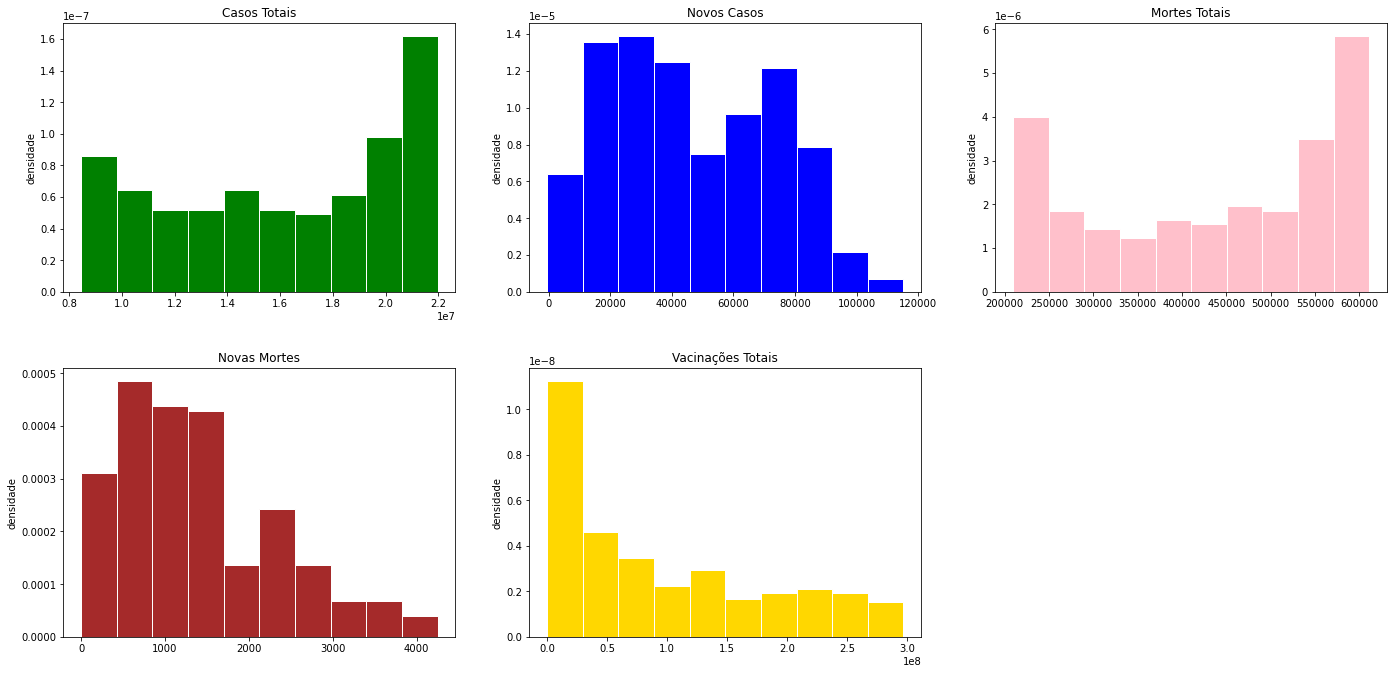

In [7]:
figure = plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.hist(df.total_cases, edgecolor='white', color='green',density=True)
plt.title('Casos Totais')
plt.ylabel('densidade')


plt.subplot(2, 3, 2)
plt.hist(df.new_cases, edgecolor='white', color='blue', density=True)
plt.title('Novos Casos')
plt.ylabel('densidade')


plt.subplot(2, 3, 3)
plt.hist(df.total_deaths, edgecolor='white', color='pink', density=True)
plt.title('Mortes Totais')
plt.ylabel('densidade')


plt.subplot(2, 3, 4)
plt.hist(df.new_deaths, edgecolor='white', color='brown', density=True)
plt.title('Novas Mortes')
plt.ylabel('densidade')


plt.subplot(2, 3, 5)
plt.hist(df.total_vaccinations, edgecolor='white', color='gold', density=True)
plt.title('Vacinações Totais')
plt.ylabel('densidade')

figure.tight_layout(pad=3.0)
plt.show()

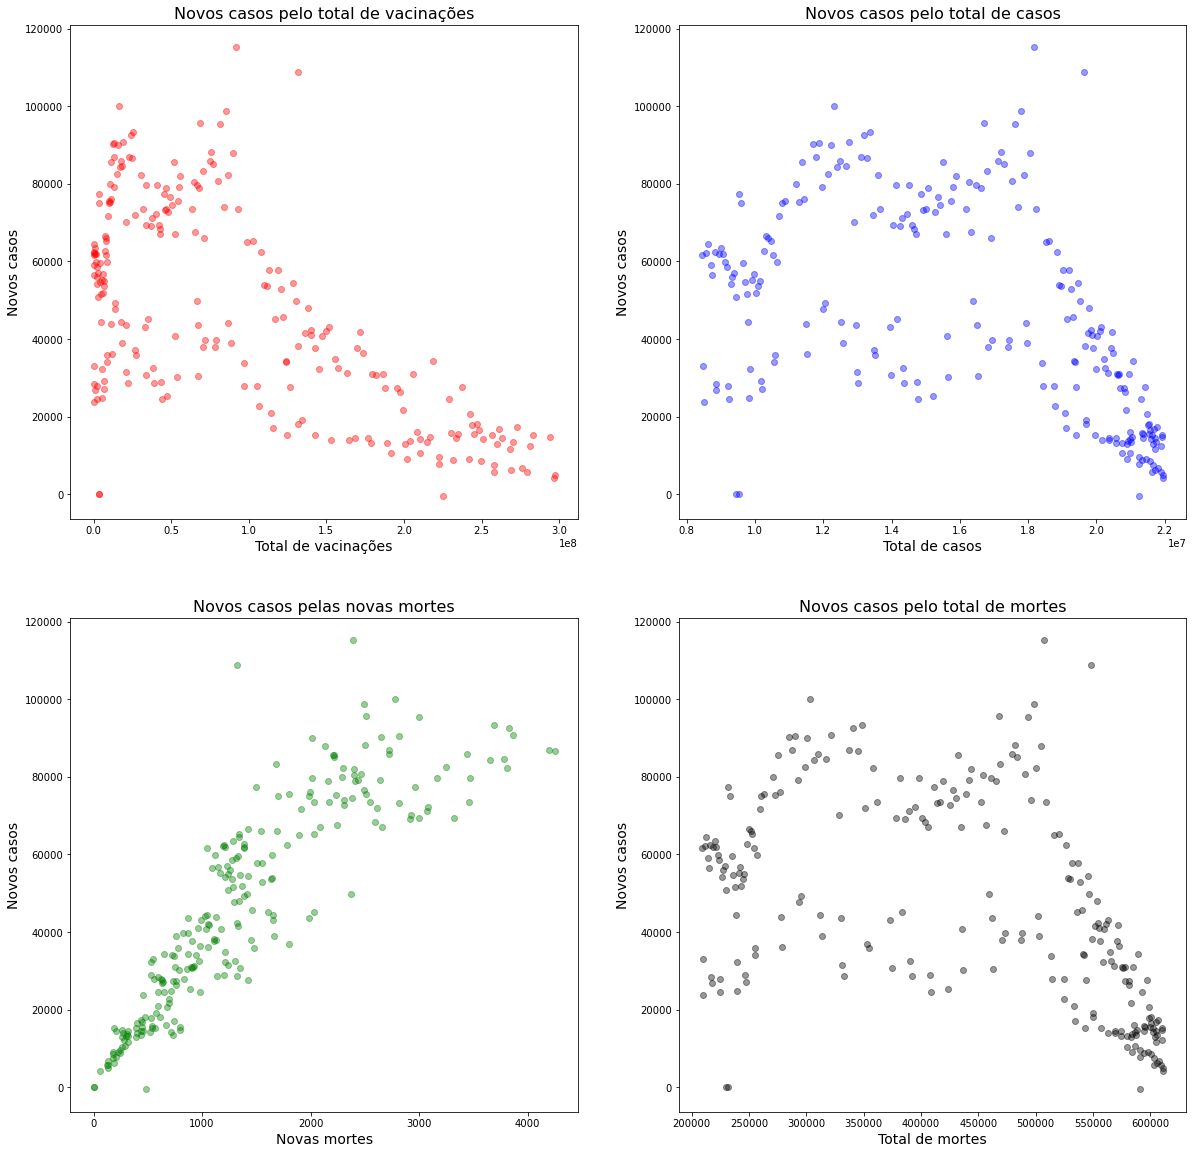

In [8]:
figure = plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.scatter(df.total_vaccinations, df.new_cases, c='red', alpha=0.4)
plt.title('Novos casos pelo total de vacinações', fontsize=16)
plt.xlabel('Total de vacinações', fontsize=14)
plt.ylabel('Novos casos', fontsize=14)

plt.subplot(2, 2, 2)
plt.scatter(df.total_cases, df.new_cases, c='blue', alpha=0.4)
plt.title('Novos casos pelo total de casos', fontsize=16)
plt.xlabel('Total de casos', fontsize=14)
plt.ylabel('Novos casos', fontsize=14)

plt.subplot(2, 2, 3)
plt.scatter(df.new_deaths, df.new_cases, c='green', alpha=0.4)
plt.title('Novos casos pelas novas mortes', fontsize=16)
plt.xlabel('Novas mortes', fontsize=14)
plt.ylabel('Novos casos', fontsize=14)

plt.subplot(2, 2, 4)
plt.scatter(df.total_deaths, df.new_cases, c='black', alpha=0.4)
plt.title('Novos casos pelo total de mortes', fontsize=16)
plt.xlabel('Total de mortes', fontsize=14)
plt.ylabel('Novos casos', fontsize=14)
plt.show()


In [9]:
sigma2 = df.var()
sigma2 = sigma2.to_list()
sigma2

[19531362700393.52,
 724216959.2966803,
 19050283105.03328,
 899515.1834985076,
 7862802479839525.0]

In [10]:
df_cov = df.cov()
df_cov.new_cases

total_cases          -5.853312e+10
new_cases             7.242170e+08
total_deaths         -1.779319e+09
new_deaths            2.241191e+07
total_vaccinations   -1.544761e+12
Name: new_cases, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.8)

In [12]:
def Regressão(Y, X):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

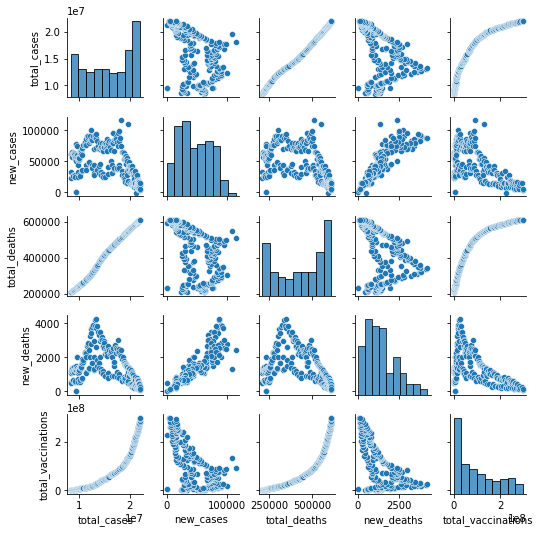

In [13]:
sns.pairplot(df, height=1.5)
plt.show()

In [14]:
X = train[['total_vaccinations', 'new_deaths', 'total_deaths','total_cases']]
Y = train['new_cases']
results = Regressão(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     192.2
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           2.84e-65
Time:                        12:14:45   Log-Likelihood:                -2084.8
No. Observations:                 193   AIC:                             4180.
Df Residuals:                     188   BIC:                             4196.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.606e+04   1.24e+04      2.900      0.004    1.15e+04    6.06e+04
total_vaccinations -3.245e-05   3.51e-05     -0.924      0.357      -0.000    3.68e-05
new_deaths            22.9054      1.289     17.767      0.000      20.362      25.449
total_deaths           0.1304      0.124      1.050      0.295      -0.115       0.375
total_cases           -0.0047      0.004     -1.109      0.269      -0.013       0.004
==============================================================================
Omnibus:                       55.571   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.137
Skew:                           1.033   Prob(JB):                     3.21e-52
Kurtosis:                       8.022   Cond. No.                     1.90e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
X1 = train[['total_vaccinations', 'new_deaths', 'total_deaths']]
Y1 = train['new_cases']
results1 = Regressão(Y1,X1)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     255.6
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           3.01e-66
Time:                        12:14:45   Log-Likelihood:                -2085.5
No. Observations:                 193   AIC:                             4179.
Df Residuals:                     189   BIC:                             4192.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.326e+04   4621.391      5.034      0.000    1.41e+04    3.24e+04
total_vaccinations  -5.51e-05   2.86e-05     -1.928      0.055      -0.000    1.27e-06
new_deaths            22.6194      1.264     17.897      0.000      20.126      25.113
total_deaths          -0.0061      0.016     -0.378      0.706      -0.038       0.026
==============================================================================
Omnibus:                       53.750   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.787
Skew:                           1.011   Prob(JB):                     3.10e-48
Kurtosis:                       7.808   Cond. No.                     7.00e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
X2 = train[['total_vaccinations', 'new_deaths']]
Y2 = train['new_cases']
results2 = Regressão(Y2,X2)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     385.0
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.46e-67
Time:                        12:15:04   Log-Likelihood:                -2085.5
No. Observations:                 193   AIC:                             4177.
Df Residuals:                     190   BIC:                             4187.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                2.18e+04   2506.277      8.698      0.000    1.69e+04    2.67e+04
total_vaccinations -6.495e-05   1.17e-05     -5.568      0.000    -8.8e-05   -4.19e-05
new_deaths            22.4224      1.149     19.522      0.000      20.157      24.688
==============================================================================
Omnibus:                       52.357   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.380
Skew:                           0.993   Prob(JB):                     1.53e-45
Kurtosis:                       7.660   Cond. No.                     3.80e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

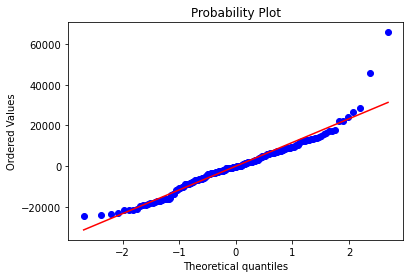

In [28]:
plt.figure()
probplot(results2.resid, dist = 'norm', plot = plt);

In [29]:
beta0_hat = results.params[0]  # const
beta1_hat = results.params[1]  # total_vaccinations
beta2_hat = results.params[2]  # new_deaths

In [30]:
def f(feature1, feature2):
    return beta0_hat + beta1_hat*feature1 + beta2_hat*feature2

In [31]:
npoints = 100
feature1 = X["total_vaccinations"]
feature2 = X["new_deaths"]
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

In [32]:
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

In [33]:
fit_z = f(eixo_x, eixo_y)

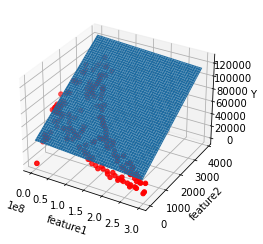

In [34]:
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z)
plt3d.scatter(feature1, feature2, Y, color="r")
plt3d.set_xlabel("feature1")
plt3d.set_ylabel("feature2")
plt3d.set_zlabel("Y")
plt.show()

Analisando

In [19]:
for i in range(0, len(feature1)):
    y = f(feature1, feature2, feature3, feature4)

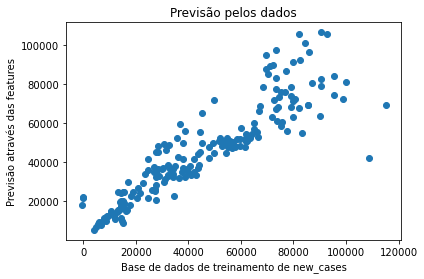

In [20]:
plt.scatter(Y, y)
plt.xlabel("Base de dados de treinamento de new_cases")
plt.ylabel("Previsão através das features")
plt.title("Previsão pelos dados")
plt.show()

In [21]:
X1 = test[['total_vaccinations', 'new_deaths', 'total_deaths','total_cases']]
Y1 = test['new_cases']

In [22]:
npoints = 100
feature1_ = X1["total_vaccinations"]
feature2_ = X1["new_deaths"]
feature3_ = X1["total_deaths"]
feature4_ = X1["total_cases"]

In [23]:
for i in range(0, len(feature1_)):
    y1 = f(feature1_, feature2_, feature3_, feature4_)

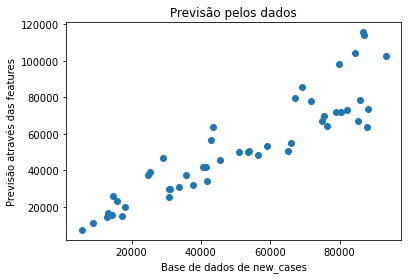

In [24]:
plt.scatter(Y1, y1)
plt.xlabel("Base de dados de new_cases")
plt.ylabel("Previsão através das features")
plt.title("Previsão pelos dados")
plt.show()

In [25]:
x_list = [min(Y), max(Y)]
x_list1 = [min(Y1), max(Y1)]

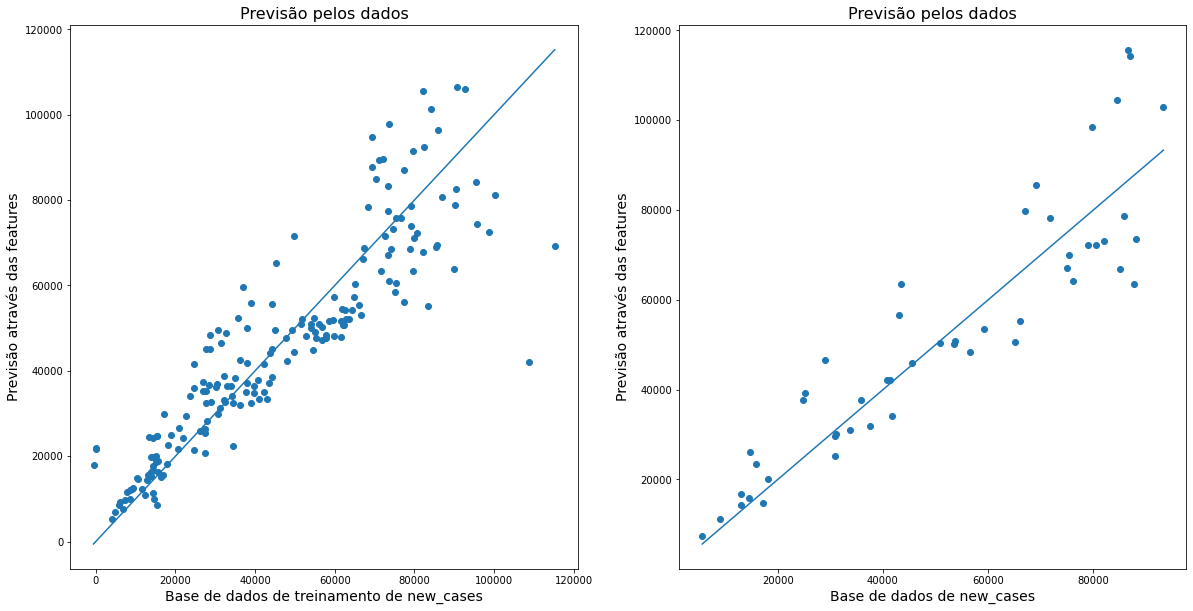

In [26]:
figure = plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(Y, y)
plt.plot(x_list, x_list)
plt.xlabel("Base de dados de treinamento de new_cases", fontsize=14)
plt.ylabel("Previsão através das features", fontsize=14)
plt.title("Previsão pelos dados", fontsize=16)

plt.subplot(1, 2, 2)
plt.scatter(Y1, y1)
plt.plot(x_list1, x_list1)
plt.xlabel("Base de dados de new_cases", fontsize=14)
plt.ylabel("Previsão através das features", fontsize=14)
plt.title("Previsão pelos dados", fontsize=16)
plt.show()

### Referências

- https://ourworldindata.org/covid-deaths